## シミュレーションを試行錯誤しながら作成してみる
ネットワークグラフを用いたシミュレーションは、現代社会の複雑な課題を深く理解し、効果的に解決するための不可欠なツールです。例えば、情報の拡散やウイルスの伝染経路をモデル化することで、情報がどのように広がり、感染がどのように進行するのかを予測し、それに基づいてより効果的な予防策やキャンペーン戦略を設計できます。

このようなシミュレーションを通じて、複雑な現実の問題に対する深い理解を得ると同時に、実用的な解決策を見つけ出すことができます。スクリプトはネットワークグラフを活用し、多様なモデルを用いたシミュレーションを作成することで、社会的影響やインフラの最適化に関する新たな洞察を追求することを目標としています。現行のスクリプトはまだ検証が不十分で、改良の余地がありますが、継続的に改善を重ねることで、より精緻な解析と有用な結果を導き出せると確信しています。

## SIRモデル
このスクリプトは、ネットワーク上での感染症の拡散をシミュレートし、感染のトレンドと感染状況を可視化することを目的としています。具体的には、エルデシュ・レーニー型ランダムグラフ上でSIRモデルを適用し、感染症の拡散パターンを分析するためのシミュレーションを行います。<br>

**大まかな手順**<br>
**ライブラリのインポート**<br>
networkx と matplotlib.pyplot を用いてグラフの生成と可視化を行います。<br>
numpy は数値計算に使用します。<br>
ndlib ライブラリから、エピデミックモデルや可視化用のツールをインポートします。<br>
**ネットワークの生成**<br>
nx.erdos_renyi_graph(1000, 0.1) を使用して、1000ノードと0.1の接続確率を持つエルデシュ・レーニー型ランダムグラフを生成します。<br>
**SIRモデルの設定**<br>
ep.SIRModel(g) を用いて、生成したネットワーク g に基づくSIR（感受性・感染・回復）モデルを初期化します。<br>
mc.Configuration() を使ってモデルのパラメータを設定します。ここでは、感染率 beta、回復率 gamma、および初期感染者の割合を指定します。<br>
**シミュレーションの実行**<br>
model.iteration_bunch(200) で200回のイテレーションを実行し、感染の拡散をシミュレートします。<br>
model.build_trends(iterations) を使用して、シミュレーション結果からトレンドデータを構築します。<br>
**結果の可視化**<br>
DiffusionTrend を用いて、感染のトレンド（時間とともに感染者数の変化）をプロットし、plt.show() で表示します。<br>
DiffusionPrevalence を用いて、感染の普及状況（ネットワーク全体での感染者の割合）をプロットし、plt.show() で表示します。<br>

no display found. Using non-interactive Agg backend


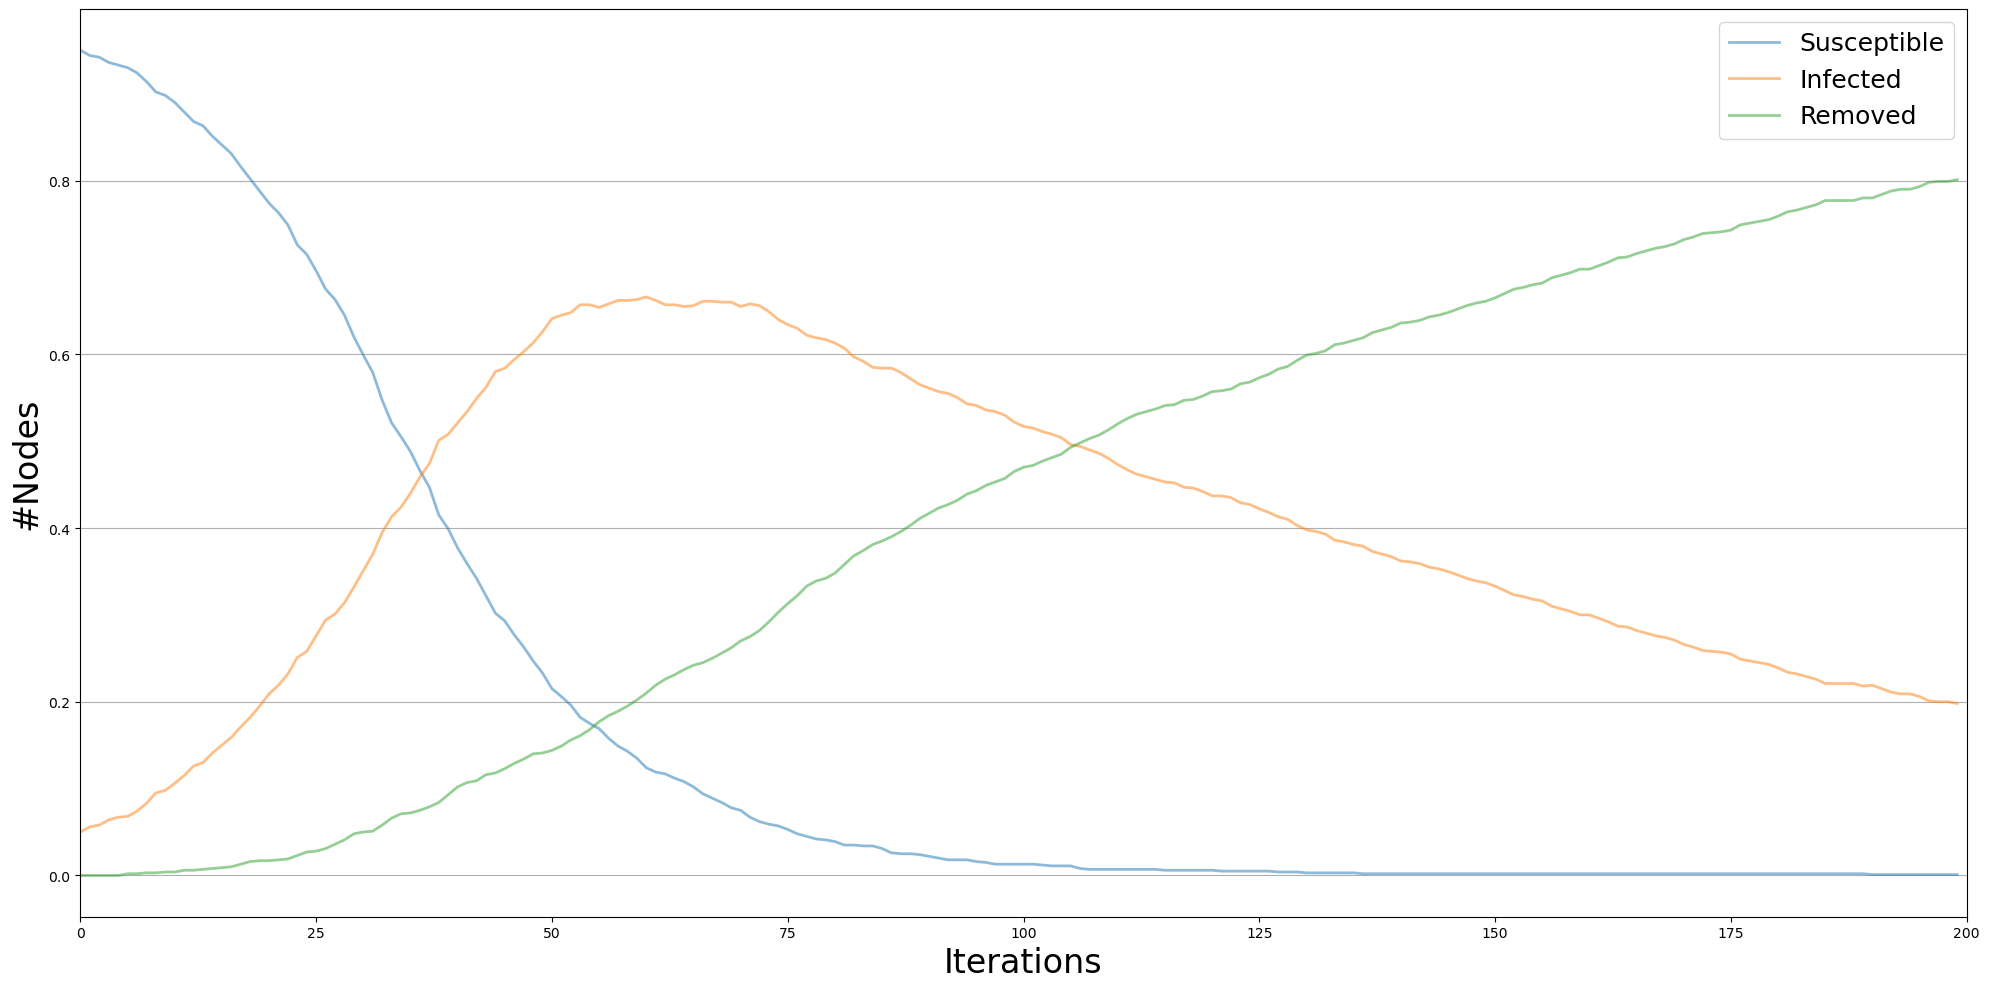

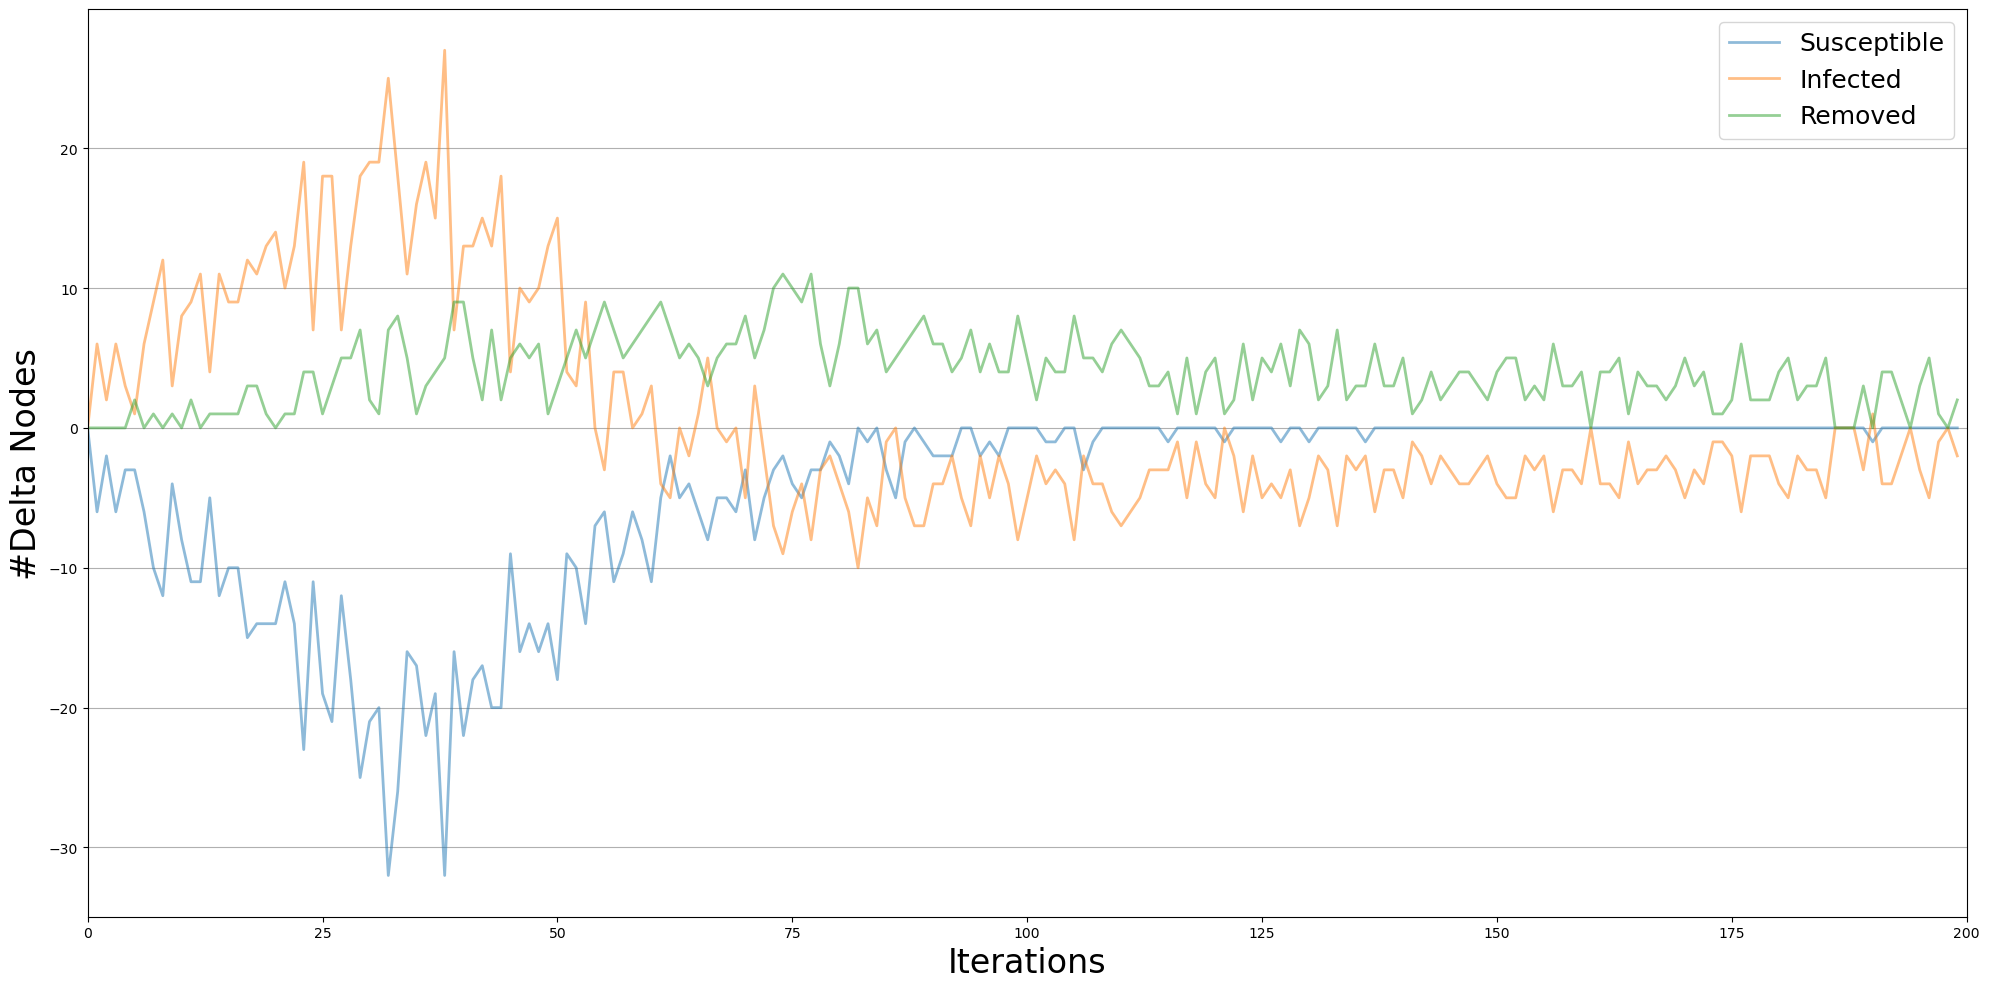

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

g = nx.erdos_renyi_graph(1000, 0.1)

model = ep.SIRModel(g)  # epモジュールから直接SIRModelをインポートして使用する

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(config)

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)  # build_trendsを正しく修正

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
plt.show()

viz2 = DiffusionPrevalence(model, trends)  # viz2を正しく定義する
viz2.plot()
plt.show()


**スクリプトの目的**<br>
このスクリプトは、スケールフリー型ネットワークにおける偽情報拡散をシミュレートし、その進行状況を可視化することを目的としています。具体的には、SIR（感受性・感染・回復）モデルを使用して、ネットワーク上の偽情報の広がりと修正情報によるノードの状態変化を追跡し、シミュレーションの結果を視覚的に表示します。<br>

**大まかな手順**<br>
**ライブラリのインポート**<br>
networkx、random、および matplotlib.pyplot をインポートし、グラフの生成、シミュレーションの実行、可視化に使用します。<br>
**スケールフリーグラフの生成**<br>
generate_scale_free_graph 関数を使用して、指定したノード数とパラメータ m_parameter でスケールフリー型グラフ（Barabási-Albertモデル）を生成します。<br>
**SIRモデルのシミュレーション**<br>
simulate_sir_model 関数でSIRモデルを実行します。初期状態として、インフルエンサー（ノードのうち次数が最も高いノード）を感染源に設定し、偽情報の拡大と回復のプロセスをシミュレーションします。<br>
各ステップごとにノードの状態（感受性、感染、回復）を記録し、シミュレーションの履歴を保存します。<br>
**シミュレーション結果の可視化**<br>
visualize_history 関数で、シミュレーションの各ステップにおけるノードの状態を色分けして可視化します。最大6つのステップをサブプロットとして表示します。<br>
plot_infection_statistics 関数で、時間とともに感受性ノード、感染ノード、回復ノードの数をプロットし、進行状況を示します。<br>
**メイン関数**<br>
main 関数で、グラフの生成、インフルエンサーの選定、SIRモデルのシミュレーション実行、そして結果の可視化を行います。<br>
このスクリプトにより、スケールフリー型ネットワーク上での感染症の拡散を視覚的に理解し、感染のトレンドやノードの状態変化を効果的に分析することができます。<br>

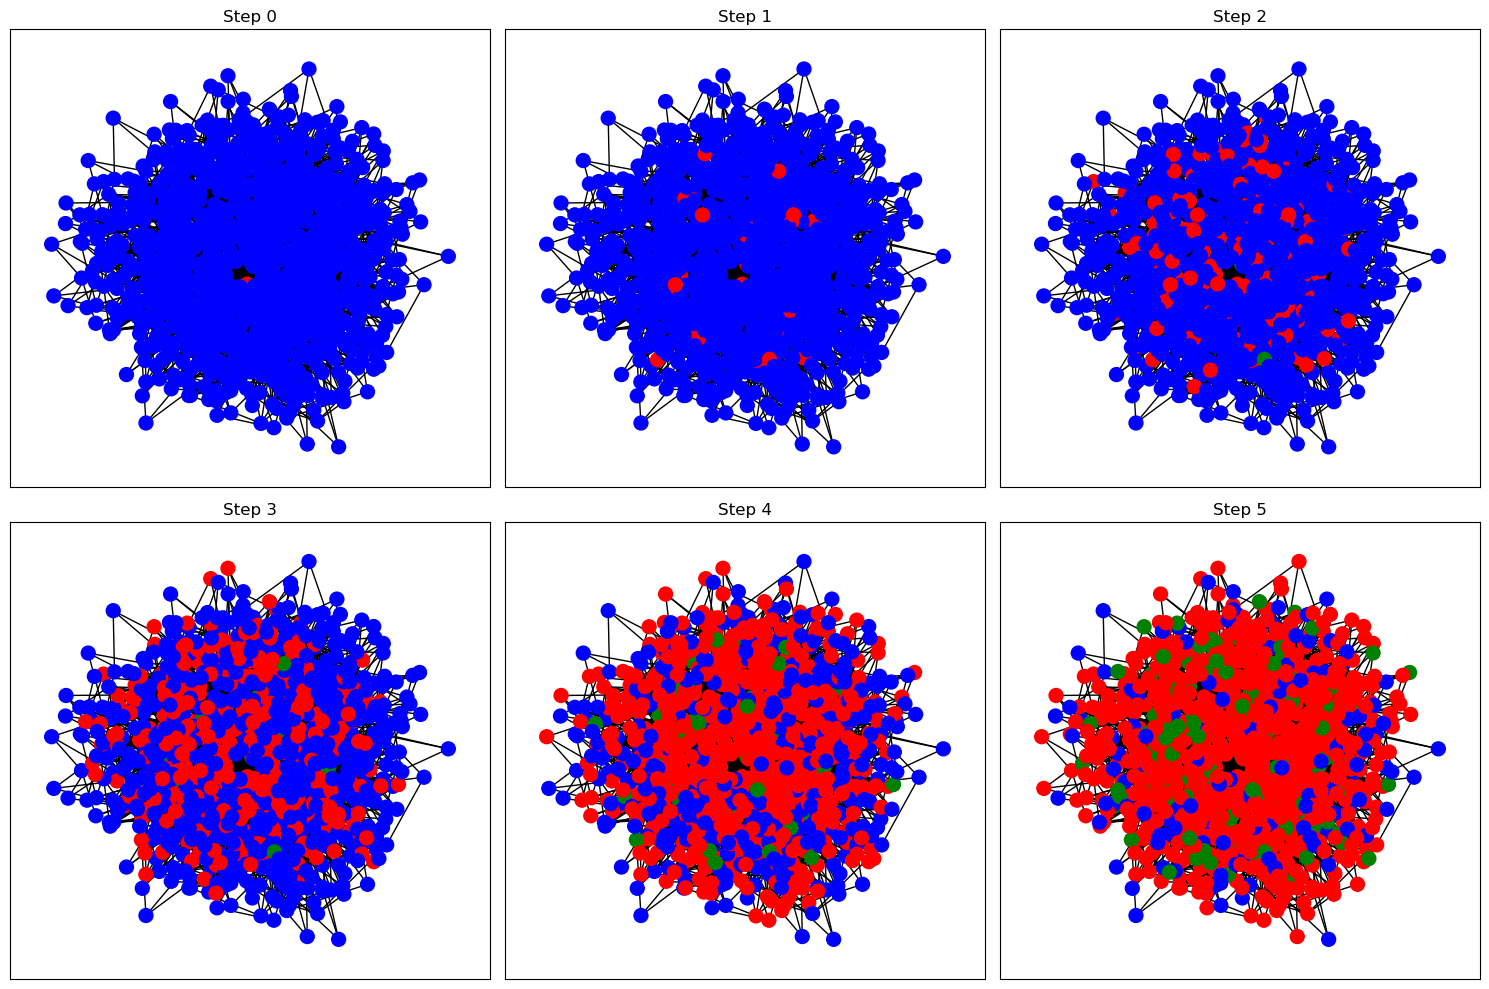

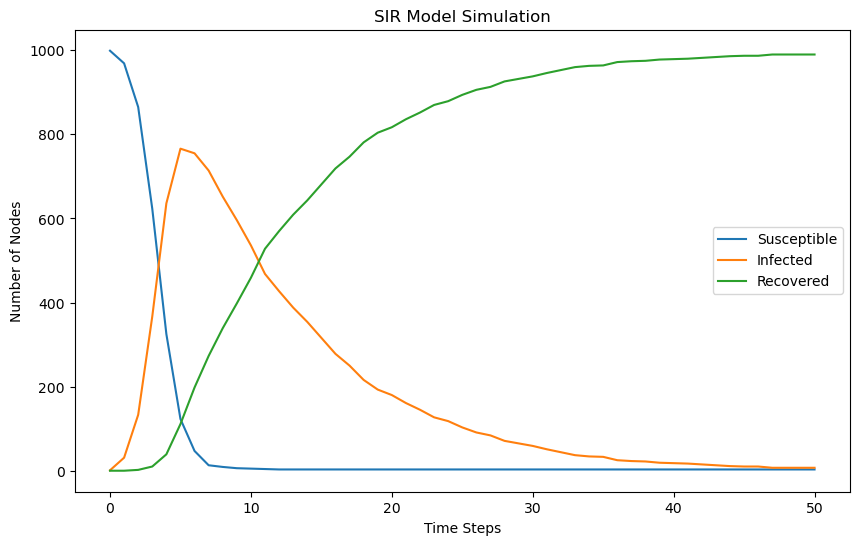

In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# スケールフリーなグラフの生成
def generate_scale_free_graph(num_nodes, m_parameter=3):
    return nx.barabasi_albert_graph(num_nodes, m_parameter)

# SIRモデルのシミュレーション
def simulate_sir_model(graph, influencer_node, beta, gamma, num_steps):
    # 初期化と感染者リストの作成
    sir_state = {node: 'S' for node in graph.nodes()}
    sir_state[influencer_node] = 'I'  # インフルエンサーを感染源に設定

    infected_nodes = {influencer_node}
    susceptible_nodes = set(graph.nodes()) - infected_nodes
    recovered_nodes = set()

    # 時間ステップごとのシミュレーション
    history = [list(sir_state.values())]  # 初期状態を記録

    for step in range(num_steps):
        new_infected = set()
        new_recovered = set()

        for infected_node in infected_nodes:
            neighbors = set(graph.neighbors(infected_node))
            for neighbor in neighbors & susceptible_nodes:
                if random.random() < beta:
                    sir_state[neighbor] = 'I'
                    new_infected.add(neighbor)

            if random.random() < gamma:
                sir_state[infected_node] = 'R'
                new_recovered.add(infected_node)

        infected_nodes |= new_infected
        infected_nodes -= new_recovered
        susceptible_nodes -= new_infected
        recovered_nodes |= new_recovered

        history.append(list(sir_state.values()))

    return history

# グラフの可視化
def visualize_history(graph, history):
    pos = nx.spring_layout(graph)  # ノードの位置決め
    colors = {'S': 'blue', 'I': 'red', 'R': 'green'}  # 状態に対応する色

    num_steps = len(history)
    num_plots = min(num_steps, 6)  # 最大6つのサブプロットを描画

    plt.figure(figsize=(15, 10))
    for i in range(num_plots):
        plt.subplot(2, 3, i + 1)
        plt.title(f'Step {i}')
        node_colors = [colors[state] for state in history[i]]
        nx.draw_networkx(graph, pos, node_color=node_colors, with_labels=False, node_size=100)

    plt.tight_layout()
    plt.show()

# 感染者数の推移をプロット
def plot_infection_statistics(history):
    num_steps = len(history)
    susceptible_counts = []
    infected_counts = []
    recovered_counts = []

    for step in history:
        susceptible_counts.append(step.count('S'))
        infected_counts.append(step.count('I'))
        recovered_counts.append(step.count('R'))

    plt.figure(figsize=(10, 6))
    plt.plot(range(num_steps), susceptible_counts, label='Susceptible')
    plt.plot(range(num_steps), infected_counts, label='Infected')
    plt.plot(range(num_steps), recovered_counts, label='Recovered')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Nodes')
    plt.title('SIR Model Simulation')
    plt.legend()
    plt.show()

# メイン関数
def main():
    num_nodes = 1000  # グラフのノード数
    m_parameter = 3  # スケールフリーなグラフ生成のパラメータ

    # スケールフリーなグラフの生成
    graph = generate_scale_free_graph(num_nodes, m_parameter)

    # インフルエンサーのノードを選択 (次数の高いノードを選ぶ例)
    influencer_node = max(graph.degree(), key=lambda x: x[1])[0]

    # SIRモデルのパラメータ
    beta = 0.3  # 伝播率 (インフルエンサーからの二次拡散の影響度)
    gamma = 0.1  # 回復率 (感染者が回復する確率)
    num_steps = 50  # シミュレーションのステップ数

    # SIRモデルのシミュレーション実行
    history = simulate_sir_model(graph, influencer_node, beta, gamma, num_steps)

    # シミュレーション結果の可視化
    visualize_history(graph, history)
    plot_infection_statistics(history)

if __name__ == '__main__':
    main()


---
## 符号付きグラフから統計的推論による拡散確立の変化を求める
このスクリプトは、スケールフリーなソーシャルネットワーク上で偽情報と修正情報の拡散過程を探索します。ネットワーク内の各ノードはエージェントを表し、各エージェントは中立、偽情報、または修正情報のいずれかの状態を持ちます。特に、ベイズ理論に基づく更新を使用して、各エージェントが情報をどのように拡散するかを評価します。シミュレーションの結果として、偽情報と修正情報の拡散確率の変化を視覚化し、情報拡散のダイナミクスを理解出来ることを目標としました。<br>

### 大まかな手順
**1.初期設定**<BR>
・エージェント（ノード）の数を100<BR>
・修正情報を拡散するエージェントの初期数を2<BR>
・偽情報を拡散する確率0.6<BR>
・修正情報を拡散する確率0.1<BR>
・シミュレーションの反復回数10<BR>
・修正情報の発信を開始するイテレーション数の遅延5<BR>

**2.ネットワークの生成**<br>
スケールフリーなソーシャルネットワークを生成するために、BAモデルを使用します。ネットワークは100ノードで構成され、各ノードは平均で3つの新しいエッジを持ちます。<br>
・ノード数 $N$ および各ノードの初期接続数 $m$ を設定します。<BR>
・新しいノードを追加し、既存のノードに $m$ 本のエッジをランダムに接続します。この接続は既存ノードの次数に比例して行われます（優先的選択）。<br>

**3.エッジに符号を追加（符号付きグラフ）**<br>
エッジに符号を持たせることでネットワークの関係性（正＝ポジティブ、負＝ネガティブ）を考慮した情報拡散が可能になります。正の符号を付ける確率を $p$ とし、負の符号を付ける確率を $1−p$ とします。ここで、スクリプトでは $p=0.7$ と設定しています。これによりネットワークのリアリズムが向上し、より複雑な情報拡散のシナリオをシミュレーションできます。<br>

**4.ノードの初期化**<br>
各ノードの初期状態を「中立」に設定します。次に、次数の最も高いノードを偽情報拡散者として設定し、ランダムに選ばれた2つのノードを修正情報拡散者として設定します。<br>
・中立（neutral）<BR>
・偽情報（fake）<BR>
・修正情報（correction）<BR>

**5.最も次数の高いノードを偽情報発信者に設定する**<br>
最も次数の高いノードの上位3つからランダムに一つを選び、偽情報発信者に設定することで、インフルエンサーの影響力を反映することが期待できます。<br>

**6.ベイズ更新を用いた情報の拡散**<br>
ベイズ更新は、ある事象 $A$ に対する事前確率 $P(A)$ を、観測データ $B$ を基に事後確率 $P(A∣B)$ に更新する手法です。数式は以下の通りです。<br>
$P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$<br>

このスクリプトでは、以下の形でベイズ更新を適用しています。<br>
$P_{\text{new}} = \frac{L \cdot P}{L \cdot P + (1-L) \cdot (1-P)}$<br>

ここで、$P$ は事前確率、$L$ は尤度（この場合は信頼度を考慮した拡散確率）、$E$ は観測データです。<br>
ベイズ更新を用いることで、各ノードの偽情報および修正情報拡散確率が動的に変化します。より現実的な情報拡散モデルを提供し、ノードが新しい情報を受け取るたびにその確率を更新することで、ネットワーク内の情報拡散パターンが複雑化します。<br>
偽情報を拡散する確率 $P fake​$<BR>
修正情報を拡散する確率 $P correction​$<br>

**7.符号付きネットワークのバランス評価**<br>
各イテレーションの後、ノードの状態数（中立、偽情報、修正情報）をカウントし、ネットワークの状態を視覚化します。また、各イテレーションにおける偽情報と修正情報の平均確率をプロットします。<br>
**Φメソッド**<br>
符号付きネットワークのバランスを評価するために、以下のように定義されたΦメソッドを使用します<br>
$\Phi = \frac{E_{\text{total}}}{E_{\text{balanced}}}$<br>
<br>
- $E_{\text{total}}$: ネットワーク内の全エッジ数<br>
- $E_{\text{balanced}}$: バランスの取れたエッジの数（正のエッジで結ばれた友好的な関係、または負のエッジで結ばれた敵対的な関係）<br>
    **解釈**<br>
    - $Φ = 1$ の場合、ネットワークは完全にバランスが取れています。
    - $Φ > 1$ の場合、ネットワークはアンバランスな状態にあります。
    - $Φ$の値が大きいほど、ネットワークのアンバランスの度合いが高くなります。
    
**補足）** 符号付きグラフとベイズ更新は、以下のような効果が期待できます。

**情報拡散のリアリズム向上：** エッジに符号を追加し、ノードの信頼度を考慮することで、ネットワーク内の関係性を考慮した情報拡散が可能になり、より現実的なシナリオをシミュレートできます。具体的には、信頼度の高いノードからの情報はより広がりやすく、信頼度の低いノードからの情報は広がりにくくなります。<br>
**ダイナミックな情報拡散パターン：** ベイズ更新を導入することで、ノードの情報拡散確率が動的に変化し、複雑な拡散パターンを観察できます。これにより、ネットワーク内での情報拡散の挙動をより詳細かつ現実的に理解することができます。<br>

### ストーリー
このスクリプトでは、修正情報発信者はシミュレーションの開始時に設定されますが、修正情報の発信自体は特定のイテレーション数が経過するまでは行われません。そのため、シミュレーションの最初の段階では偽情報が広まりやすくなり、設定した遅延が経過した後に修正情報が発信され始めるという流れになります。具体的なストーリーとして考えられるのは以下の通りです。<br>

**イテレーション 1：** 修正情報発信者が存在するが、修正情報はまだ発信されない。偽情報発信者が偽情報を拡散し始める。<br>
**イテレーション 2-4：** 偽情報が拡散し続ける。修正情報はまだ発信されない。<br>
**イテレーション 5（iteration_delay の経過後）：** 修正情報の発信が始まる。偽情報と修正情報の拡散が同時に進行する。<br>
**以降のイテレーション：** 偽情報と修正情報がノード間で競い合いながら拡散される。<br>

このシミュレーションにより、偽情報が初期段階で爆発的に広まる様子を観察し、その後修正情報がそれをどのように抑制していくかを確認できます。この設定は、実際のソーシャルネットワークにおける情報拡散の動態をより現実的に再現するための一つの方法です。

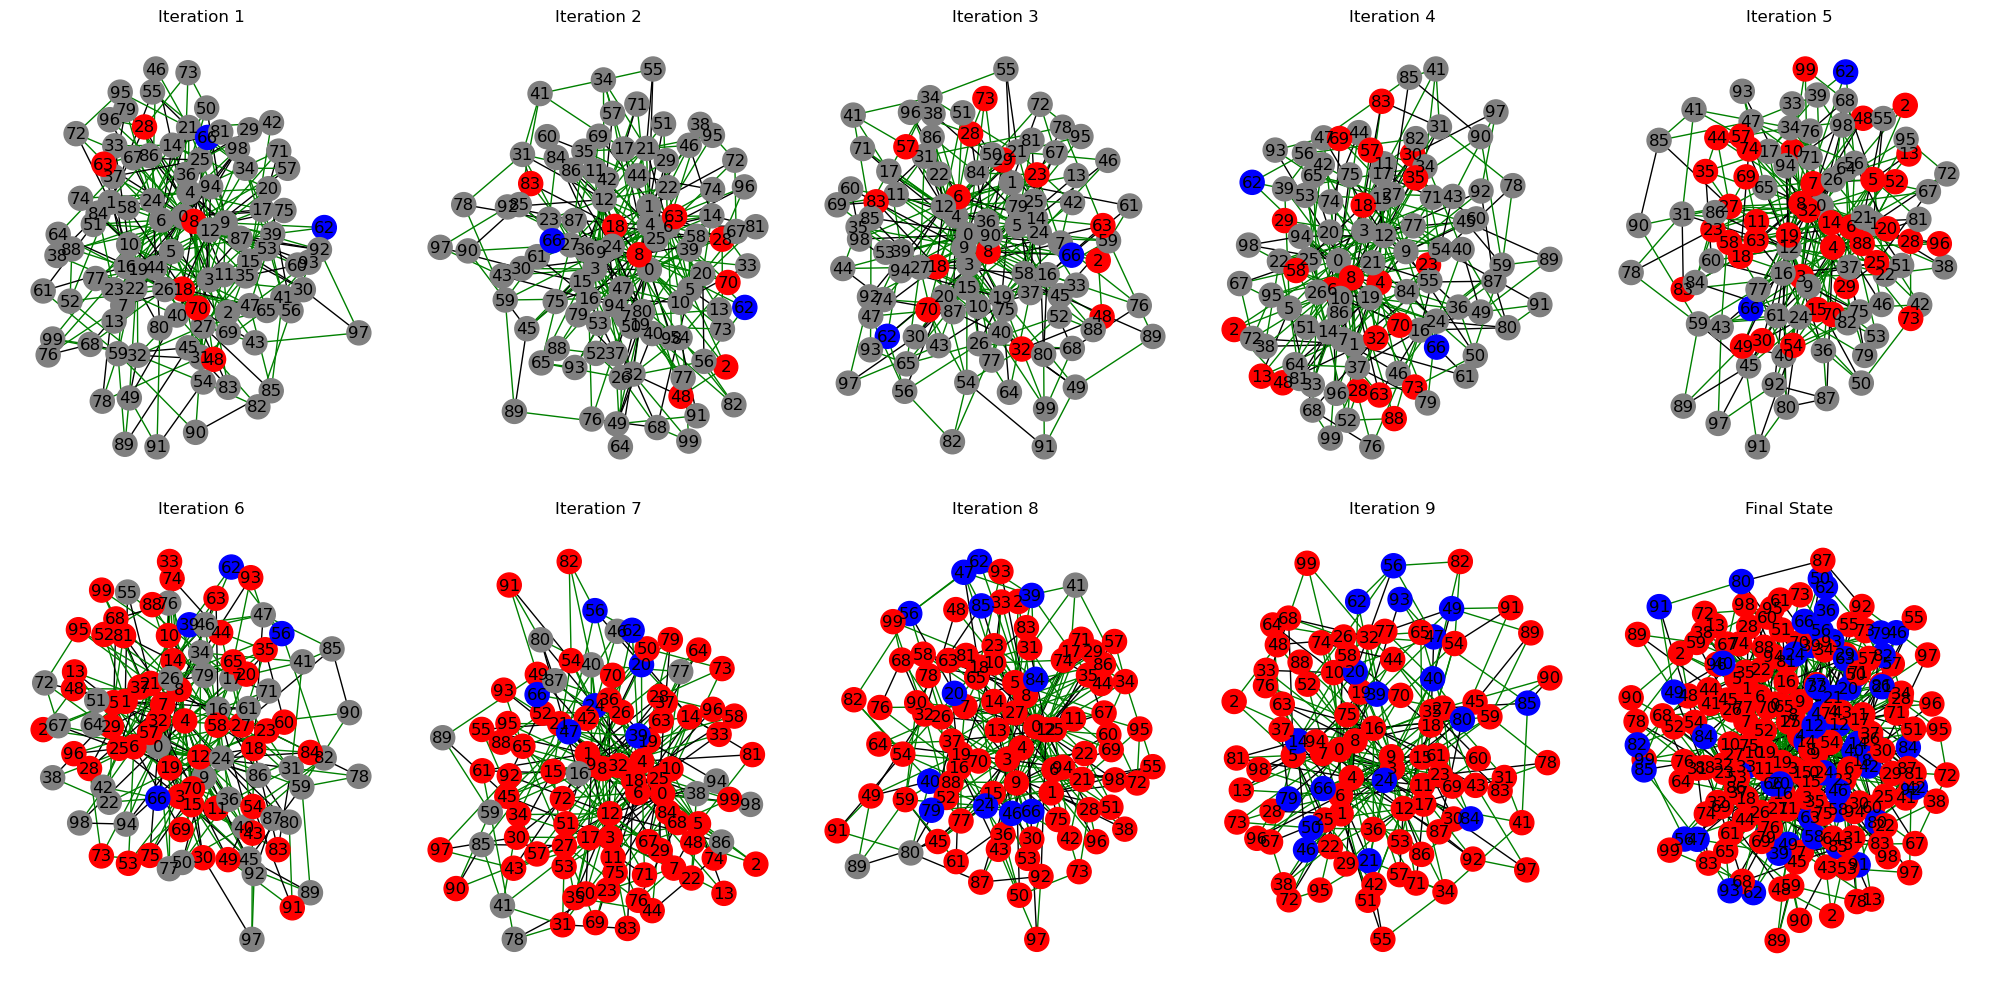

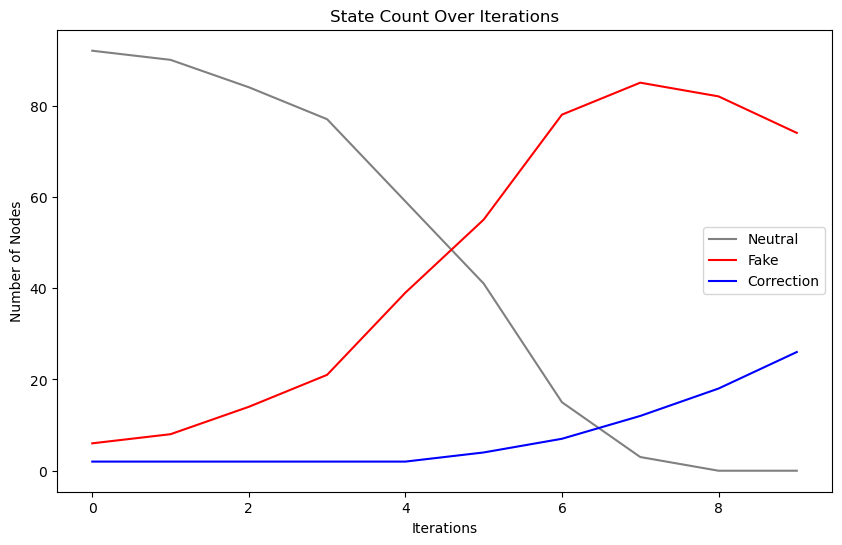

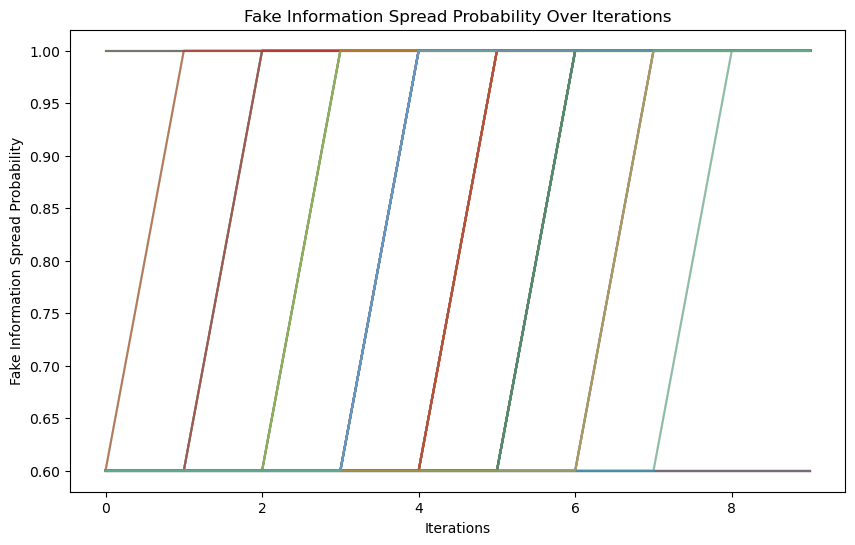

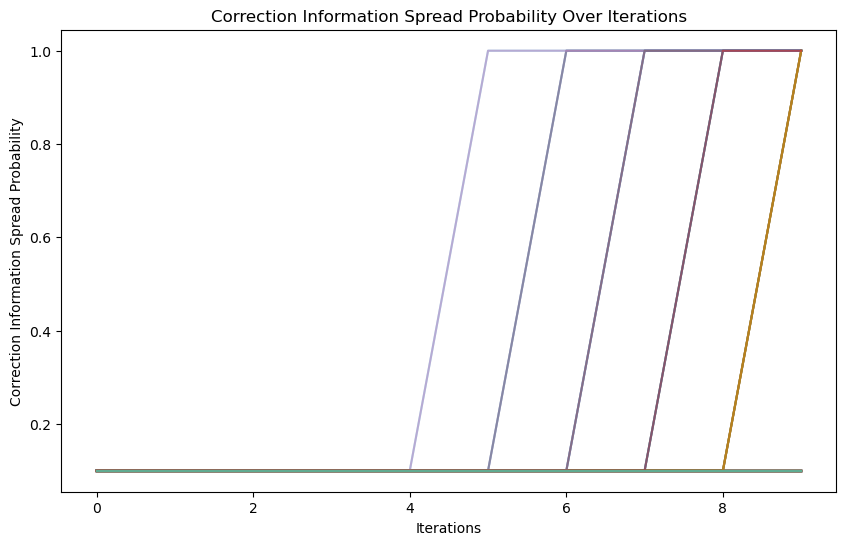

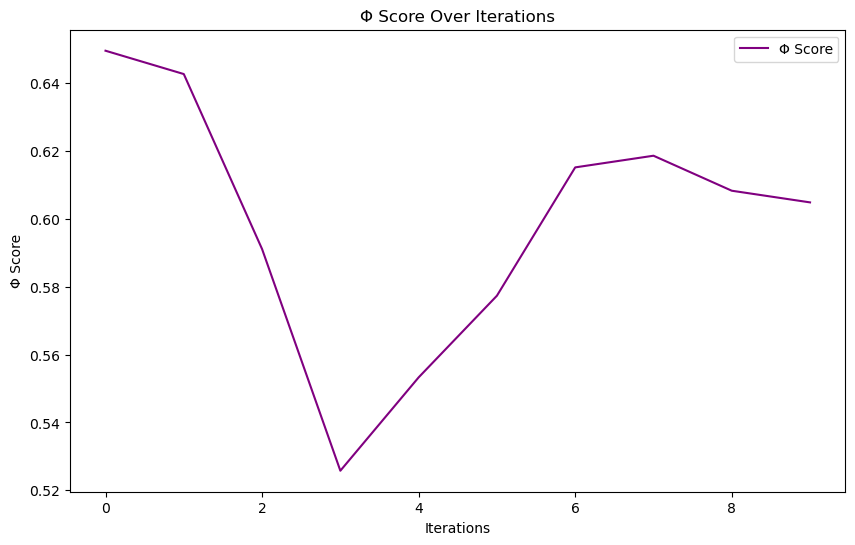

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# 初期設定
num_nodes = 100  # エージェントの数
initial_correction_spreaders = 2  # 修正情報を拡散するエージェントの初期数
fake_spread_prob = 0.6  # 偽情報を拡散する確率
correction_spread_prob = 0.1  # 修正情報を拡散する確率
iterations = 10  # シミュレーションの反復回数
iteration_delay = 5  # 修正情報の発信を開始するイテレーション数の遅延

# スケールフリーなソーシャルネットワークの生成
G = nx.barabasi_albert_graph(num_nodes, 3)

# エッジに符号（正または負）を追加
positive_ratio = 0.7
negative_ratio = 0.3

for u, v in G.edges:
    if random.random() < positive_ratio:
        G.edges[u, v]['sign'] = 1
    else:
        G.edges[u, v]['sign'] = -1

# ノードの属性の初期化
for node in G.nodes:
    G.nodes[node]['state'] = 'neutral'
    G.nodes[node]['fake_prob'] = fake_spread_prob
    G.nodes[node]['correction_prob'] = correction_spread_prob
    G.nodes[node]['trust'] = random.uniform(0.5, 1.0)  # 信頼度をランダムに設定

# グラフを可視化する関数
def visualize_graph(G, title, ax):
    color_map = {'neutral': 'gray', 'fake': 'red', 'correction': 'blue'}
    edge_color_map = {1: 'green', -1: 'black'}
    colors = [color_map[G.nodes[node]['state']] for node in G.nodes]
    edge_colors = [edge_color_map[G.edges[edge]['sign']] for edge in G.edges]
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=colors, edge_color=edge_colors, with_labels=True, node_size=300, ax=ax)
    ax.set_title(title)

# 次数の高いノードを特定し、最も次数の高いノードの一つを偽情報発信者に設定する
highest_degree_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)
highest_degree_node = random.choice(highest_degree_nodes[:3])[0]  # 上位3つからランダムに選択
G.nodes[highest_degree_node]['state'] = 'fake'
initial_fake_nodes = [highest_degree_node]

# 初期の修正情報発信者を設定する関数
def set_initial_correction_spreaders(G, initial_correction_spreaders):
    neutral_nodes = [node for node in G.nodes if G.nodes[node]['state'] == 'neutral']
    chosen_nodes = random.sample(neutral_nodes, initial_correction_spreaders)
    for node in chosen_nodes:
        G.nodes[node]['state'] = 'correction'

# ベイズ更新を用いた情報の拡散を行う関数
def bayesian_update(prior, likelihood, evidence):
    return (likelihood * prior) / ((likelihood * prior) + ((1 - evidence) * (1 - prior)))

# 情報の拡散を行う関数
def spread_information(G, iteration, delay):
    new_states = {}
    for node in G.nodes:
        if G.nodes[node]['state'] == 'neutral':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'fake':
                    # 信頼度を考慮した偽情報の拡散確率
                    adjusted_fake_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['fake_prob']
                    G.nodes[node]['fake_prob'] = bayesian_update(G.nodes[node]['fake_prob'], adjusted_fake_prob, 1)
                    if random.random() < G.nodes[node]['fake_prob']:
                        new_states[node] = 'fake'
                elif G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
        elif G.nodes[node]['state'] == 'fake':
            neighbors = list(G.neighbors(node))
            if neighbors:
                chosen_neighbor = random.choice(neighbors)
                if G.nodes[chosen_neighbor]['state'] == 'correction' and iteration >= delay:
                    # 信頼度を考慮した修正情報の拡散確率
                    adjusted_correction_prob = G.nodes[chosen_neighbor]['trust'] * G.nodes[node]['correction_prob']
                    G.nodes[node]['correction_prob'] = bayesian_update(G.nodes[node]['correction_prob'], adjusted_correction_prob, 1)
                    if random.random() < G.nodes[node]['correction_prob']:
                        new_states[node] = 'correction'
    
    for node, new_state in new_states.items():
        G.nodes[node]['state'] = new_state

# 状態数をカウントする関数
def count_states(G):
    state_count = {'neutral': 0, 'fake': 0, 'correction': 0}
    for node in G.nodes:
        state = G.nodes[node]['state']
        state_count[state] += 1
    return state_count

# 各ノードの確率を記録するための関数
def record_probabilities(G, fake_probs, correction_probs):
    fake_probs.append([G.nodes[node]['fake_prob'] for node in G.nodes])
    correction_probs.append([G.nodes[node]['correction_prob'] for node in G.nodes])

# 符号付きネットワークのバランスを評価するΦメソッド
def phi_method(G):
    balanced_edges = 0
    total_edges = len(G.edges)
    for u, v in G.edges:
        if G.edges[u, v]['sign'] == 1 and G.nodes[u]['state'] == G.nodes[v]['state']:
            balanced_edges += 1
        elif G.edges[u, v]['sign'] == -1 and G.nodes[u]['state'] != G.nodes[v]['state']:
            balanced_edges += 1
    return balanced_edges / total_edges

# 初期の修正情報発信者を設定
set_initial_correction_spreaders(G, initial_correction_spreaders)

# シミュレーションの実行と状態数の記録
state_counts = {'neutral': [], 'fake': [], 'correction': []}
fake_probabilities = []
correction_probabilities = []
phi_scores = []

fig, axs = plt.subplots(2, (iterations + 1) // 2, figsize=(20, 10))
axs = axs.flatten()

for i in range(iterations):
    spread_information(G, i, iteration_delay)
    current_state_count = count_states(G)
    for state, count in current_state_count.items():
        state_counts[state].append(count)
    record_probabilities(G, fake_probabilities, correction_probabilities)
    phi_score = phi_method(G)
    phi_scores.append(phi_score)
    visualize_graph(G, f"Iteration {i + 1}", axs[i])

# 最終状態の可視化
visualize_graph(G, "Final State", axs[-1])
plt.tight_layout()
plt.show()

# イテレーションごとの状態数をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), state_counts['neutral'], label='Neutral', color='gray')
plt.plot(range(iterations), state_counts['fake'], label='Fake', color='red')
plt.plot(range(iterations), state_counts['correction'], label='Correction', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Number of Nodes')
plt.title('State Count Over Iterations')
plt.legend()
plt.show()

# 確率の変化をプロットする
plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [fake_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Fake Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Fake Information Spread Probability')
plt.title('Fake Information Spread Probability Over Iterations')
plt.show()

plt.figure(figsize=(10, 6))
for i in range(num_nodes):
    plt.plot(range(iterations), [correction_probabilities[j][i] for j in range(iterations)], label=f'Node {i} Correction Prob', alpha=0.5)
plt.xlabel('Iterations')
plt.ylabel('Correction Information Spread Probability')
plt.title('Correction Information Spread Probability Over Iterations')
plt.show()

# Φスコアの変化をプロットする
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), phi_scores, label='Φ Score', color='purple')
plt.xlabel('Iterations')
plt.ylabel('Φ Score')
plt.title('Φ Score Over Iterations')
plt.legend()
plt.show()
